In [5]:
!pip install yfinance
!pip install finance-datareader

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
Tech_US=[ 'MSFT','NFLX','GOOG','AMZN','META','TSLA', 'AAPL' ] # 마이크로소프트 , 넷플릭스, 구글, 아마존 'NVDA', 'META', 'TSLA','AAPL’
Tech_KR=['005930','000660','035420','066570','207940','005380','105560'] #삼성, SK하이닉스, 네이버, LG전자, 삼성바이오, 현대차, kb금융

In [9]:
# 종가 불러오기
def get_price(companies, start='2021-05-31', end='2025-05-31'):
    df= pd.DataFrame()
    for code in companies:
        try:
            price = fdr.DataReader(code, start, end)['Close']
            df[code] = price
        except Exception as e:
            print(f"Error loading {code}: {e}")
    return df

In [10]:
#US, KR 테크 기업의 주식 가격 
p_US=get_price(Tech_US)
p_KR=get_price(Tech_KR)

In [11]:
p_US

,MSFT,NFLX,GOOG,AMZN,META,TSLA,AAPL
2021-06-01,247.399994,499.079987,121.490501,160.932495,329.130005,207.966660,124.279999
2021-06-02,247.300003,499.239990,121.064003,161.699493,329.149994,201.706665,125.059998
2021-06-03,245.710007,489.429993,120.230499,159.350494,326.040009,190.946671,123.540001
2021-06-04,250.789993,494.739990,122.587997,160.311005,330.350006,199.683334,125.889999
2021-06-07,253.809998,494.660004,123.304497,159.900497,336.579987,201.710007,125.900002
...,...,...,...,...,...,...,...
2025-05-23,450.179993,1185.390015,169.589996,200.990005,627.059998,339.339996,195.270004
2025-05-27,460.690002,1211.569946,173.979996,206.020004,642.320007,362.890015,200.210007
2025-05-28,457.359985,1208.550049,173.380005,204.720001,643.580017,356.899994,200.419998
2025-05-29,458.679993,1184.859985,172.960007,205.699997,645.049988,358.429993,199.949997


In [12]:
p_KR

,005930,000660,035420,066570,207940,005380,105560
Date,,,,,,,
2021-05-31,80500,127000,362500,152000,835111,235000,58800
2021-06-01,80600,128500,367000,151500,822263,237000,58800
2021-06-02,80800,126000,363000,151500,808427,238000,58900
2021-06-03,82800,129000,362000,154500,814356,238500,58300
2021-06-04,82200,128500,357000,153500,830169,241500,57600
...,...,...,...,...,...,...,...
2025-05-26,54700,203000,188000,71600,1043000,181900,102000
2025-05-27,53900,202500,183800,69000,1026000,181900,101900
2025-05-28,55900,208000,187700,71200,1028000,185900,101000


<Axes: xlabel='Date'>

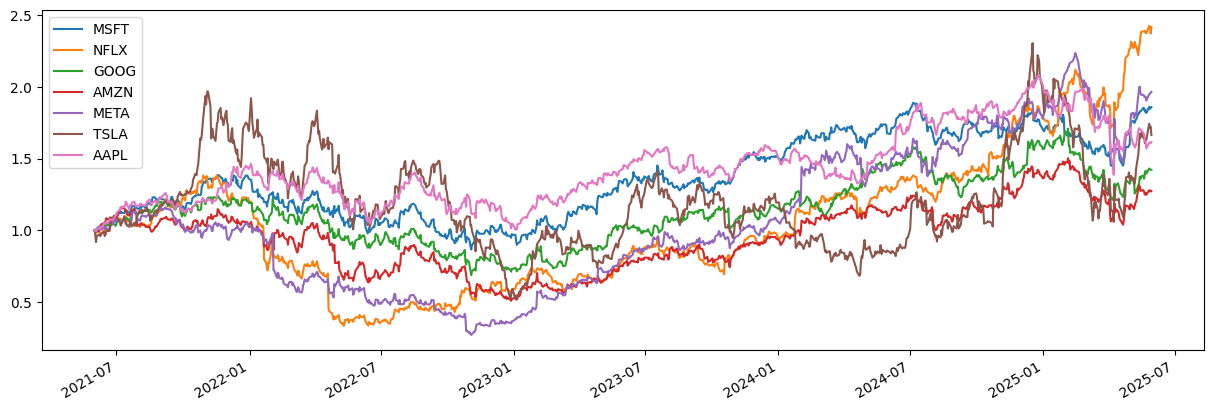

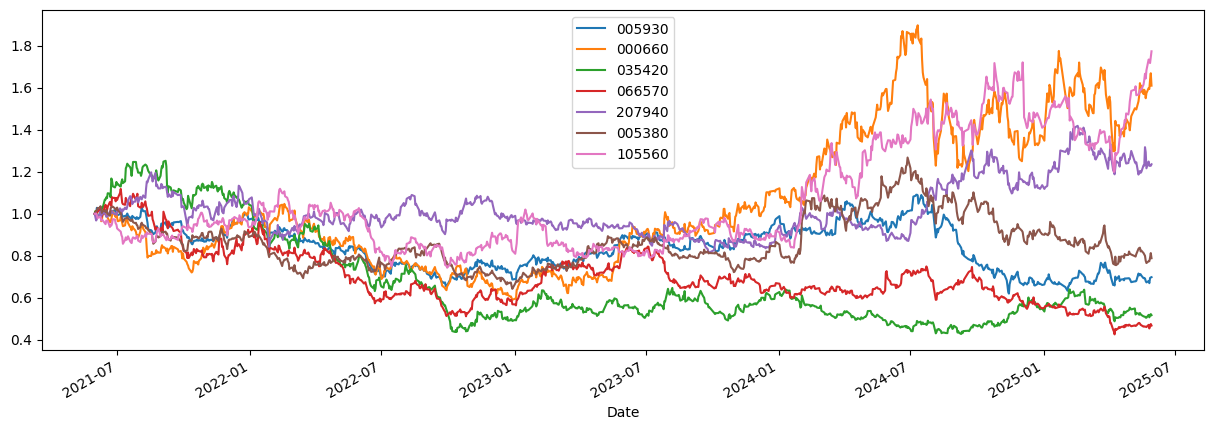

In [13]:
# plotting
(p_US/p_US.iloc[0]).plot(figsize=(15,5))
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))

In [14]:
# Return 계산
# Daily Return 
r_US=p_US/p_US.shift()-1 
r_KR=p_KR/p_KR.shift()-1 

In [15]:
# Average Return (Total period)
r_a_US=(p_US.iloc[-1])/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1])/p_KR.iloc[0]-1

In [17]:
r_a_US

MSFT    0.860792
NFLX    1.418911
GOOG    0.422745
AMZN    0.273888
META    0.967277
TSLA    0.665940
AAPL    0.616109
dtype: float64

In [18]:
r_a_KR

005930   -0.301863
000660    0.610236
035420   -0.482759
066570   -0.532237
207940    0.235764
005380   -0.211489
105560    0.773810
dtype: float64

In [19]:
# Averate Return (Daily)
r_a_d_US=(1+r_a_US)**(1/p_US.shape[0])-1
r_a_d_KR=(1+r_a_KR)**(1/p_KR.shape[0])-1

In [20]:
# 포트폴리오 수익률 계산을 위한 weights 정의
weights_US = np.array([1/7] * 7)   # 미국 주식 7종목 동일 비중
weights_KR = np.array([1/7] * 7) # 한국 주식 7종목 동일 비중

In [21]:
# 포트폴리오 수익률 계산
port_return_US = np.dot(weights_US, r_a_US)
port_return_KR = np.dot(weights_KR, r_a_KR)

In [22]:
print('미국 포트폴리오 전체 수익률:', port_return_US)
print('한국 포트폴리오 전체 수익률:', port_return_KR)

미국 포트폴리오 전체 수익률: 0.7465232037134906
한국 포트폴리오 전체 수익률: 0.013065919180476296


In [23]:
covar_US= r_US.cov()*252
covar_KR= r_KR.cov()*252

In [24]:
covar_US

,MSFT,NFLX,GOOG,AMZN,META,TSLA,AAPL
MSFT,0.072863,0.055631,0.058888,0.067593,0.073971,0.072715,0.051218
NFLX,0.055631,0.204554,0.059127,0.081982,0.099194,0.103442,0.054236
GOOG,0.058888,0.059127,0.100145,0.076120,0.086966,0.083912,0.054791
AMZN,0.067593,0.081982,0.076120,0.135121,0.103802,0.105193,0.060896
META,0.073971,0.099194,0.086966,0.103802,0.210447,0.101217,0.066796
TSLA,0.072715,0.103442,0.083912,0.105193,0.101217,0.380133,0.089898
AAPL,0.051218,0.054236,0.054791,0.060896,0.066796,0.089898,0.081772


In [25]:
covar_KR

,005930,000660,035420,066570,207940,005380,105560
005930,0.064861,0.060406,0.030169,0.035886,0.013285,0.029295,0.022905
000660,0.060406,0.162298,0.040210,0.045830,0.020541,0.038353,0.032712
035420,0.030169,0.040210,0.115745,0.037293,0.020720,0.022711,0.025969
066570,0.035886,0.045830,0.037293,0.110998,0.016110,0.034073,0.031601
207940,0.013285,0.020541,0.020720,0.016110,0.080321,0.012137,0.012297
005380,0.029295,0.038353,0.022711,0.034073,0.012137,0.084590,0.030236
105560,0.022905,0.032712,0.025969,0.031601,0.012297,0.030236,0.109818


<Axes: >

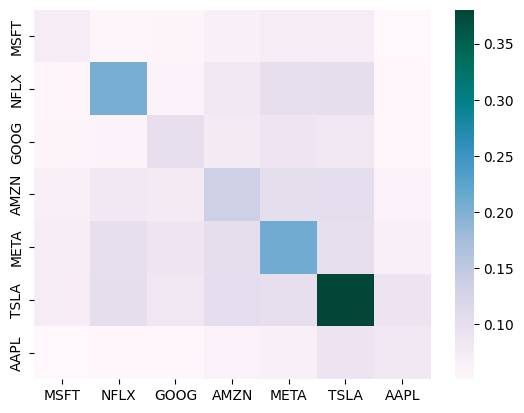

In [26]:
sns.heatmap(covar_US, cmap='PuBuGn')

<Axes: >

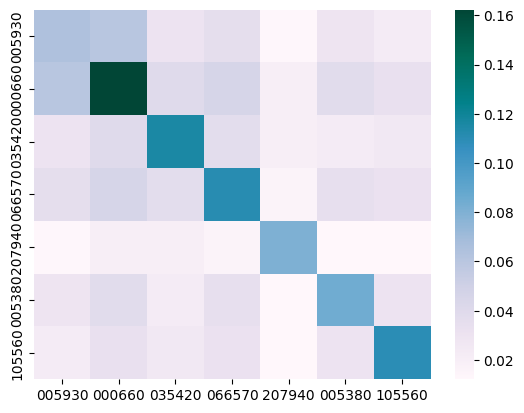

In [27]:
sns.heatmap(covar_KR, cmap='PuBuGn')

In [28]:
port_risk_US= np.dot(weights_US.T, np.dot(covar_US, weights_US))
print(port_risk_US)
port_risk_KR= np.dot(weights_KR.T, np.dot(covar_KR, weights_KR))
print(port_risk_KR)

0.08980019362895923
0.03987985043824461


In [30]:
rf=0.02
port_sr_US= (port_return_US-rf)/port_risk_US
port_sr_KR= (port_return_KR-rf)/port_risk_KR
print(port_sr_US)
print(port_sr_KR)

8.090441393872425
-0.17387429349218297


In [31]:
result=np.array([[port_return_KR, port_return_US], [port_risk_KR, port_risk_US], [port_sr_KR, port_sr_US]])
result=np.round(result, 3)

In [32]:
result=pd.DataFrame(result)
result.columns=['KR', 'US']
result.index=['Return', 'Risk', 'Sharpe ratio']
result

,KR,US
Return,0.013,0.747
Risk,0.040,0.090
Sharpe ratio,-0.174,8.090


<Axes: >

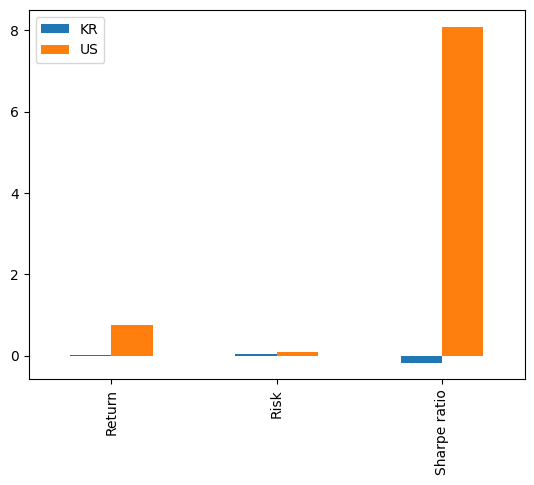

In [33]:
result.plot(kind='bar')

In [34]:
Tech_US=['MSFT', 'NFLX', 'GOOG', 'AMZN']   # 마이크로소프트 , 넷플릭스, 구글, 아마존  
Tech_KR=['005930.KS','000660.KS','035420.KS', '066570.KS' ] #삼성, SK하이닉스, 네이버, LG전자

In [36]:
yf.Ticker('MSFT').history(start='2021-05-31', end='2025-05-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-01 00:00:00-04:00,243.030424,243.088463,238.899797,239.325424,23213300,0.0,0.0
2021-06-02 00:00:00-04:00,240.031642,241.134434,237.816374,239.228729,19406700,0.0,0.0
2021-06-03 00:00:00-04:00,237.216615,238.300056,235.069069,237.690628,25307700,0.0,0.0
2021-06-04 00:00:00-04:00,239.673676,243.436714,239.431835,242.604782,25281100,0.0,0.0
2021-06-07 00:00:00-04:00,241.821245,245.797105,241.656796,245.526245,23079200,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-23 00:00:00-04:00,449.980011,453.690002,448.910004,450.179993,16883500,0.0,0.0
2025-05-27 00:00:00-04:00,456.480011,460.950012,456.119995,460.690002,20974300,0.0,0.0
2025-05-28 00:00:00-04:00,461.220001,462.519989,456.929993,457.359985,17086300,0.0,0.0


In [38]:
# price, dividends를 가져오는 함수를 정의
def get_price(companies):
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2023-5-31', end='2025-05-31')['Close']
    return df
def get_div(companies):
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2023-05-31', end='2025-05-31')['Dividends']
    return df

In [39]:
#US, KR 테크 기업의 주식 가격 
p_US=get_price(Tech_US)
p_KR=get_price(Tech_KR)
p_KR.columns=['SS', 'SKH', 'NVR', 'LGE']

In [40]:
#US, KR 테크기업의 배당금
d_US= get_div(Tech_US)
d_KR= get_div(Tech_KR)

In [41]:
d_US

,MSFT,NFLX,GOOG,AMZN
Date,,,,
2023-05-31 00:00:00-04:00,0.0,0.0,0.0,0.0
2023-06-01 00:00:00-04:00,0.0,0.0,0.0,0.0
2023-06-02 00:00:00-04:00,0.0,0.0,0.0,0.0
2023-06-05 00:00:00-04:00,0.0,0.0,0.0,0.0
2023-06-06 00:00:00-04:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2025-05-23 00:00:00-04:00,0.0,0.0,0.0,0.0
2025-05-27 00:00:00-04:00,0.0,0.0,0.0,0.0
2025-05-28 00:00:00-04:00,0.0,0.0,0.0,0.0


In [42]:
d_KR.columns=['SS', 'SKH', 'NVR', 'LGE']
d_KR.sum()

SS     2894.0
SKH    2175.0
NVR    2335.0
LGE    1800.0
dtype: float64

<Axes: xlabel='Date'>

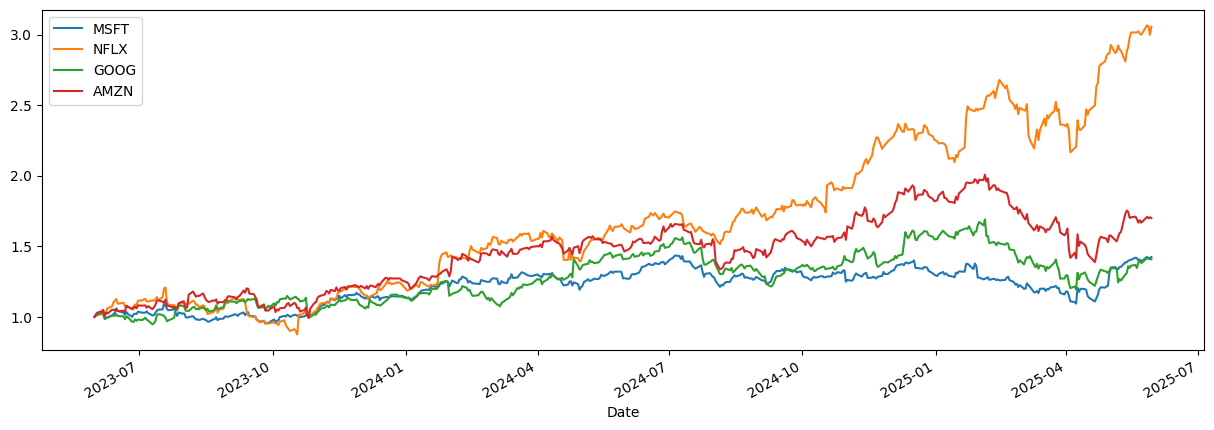

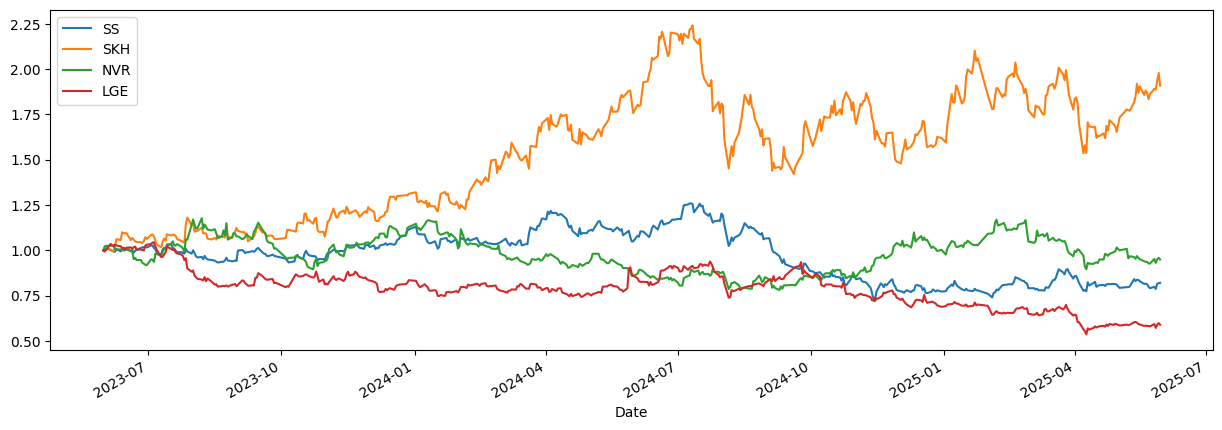

In [43]:
# plotting
(p_US/p_US.iloc[0]).plot(figsize=(15,5))
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))

In [44]:
# Daily Return 
r_US=p_US/p_US.shift()-1 
r_KR=p_KR/p_KR.shift()-1 

In [45]:
# Average Return (Total period)
r_a_US=(p_US.iloc[-1]+d_US.sum())/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1

In [46]:
r_a_US

MSFT    0.442749
NFLX    2.054500
GOOG    0.414229
AMZN    0.700199
dtype: float64

In [47]:
r_a_KR

SS    -0.136665
SKH    0.929365
NVR   -0.038100
LGE   -0.395196
dtype: float64

In [48]:
# Averate Return (Daily)
r_a_d_US=(1+r_a_US)**(1/p_US.shape[0])-1
r_a_d_KR=(1+r_a_KR)**(1/p_KR.shape[0])-1

In [49]:
r_a_d_US

MSFT    0.000730
NFLX    0.002227
GOOG    0.000691
AMZN    0.001058
dtype: float64

In [50]:
# 전체 포트폴리오 수익 : weights를 0.25, 0.25, 0.25, 0.25로 투자한 경우를 가정
weights=np.array([0.25, 0.25, 0.25, 0.25])
weights

array([0.25, 0.25, 0.25, 0.25])

In [51]:
port_return_US = np.dot(weights, r_a_US)
port_return_KR = np.dot(weights, r_a_KR)
port_return_KR

np.float64(0.08985090062933032)

In [52]:
print(port_return_US)
print(port_return_KR)

0.9029191710234508
0.08985090062933032


In [53]:
covar_US= r_US.cov()*252
covar_KR= r_KR.cov()*252

In [54]:
covar_US

,MSFT,NFLX,GOOG,AMZN
MSFT,0.054533,0.037777,0.037657,0.049078
NFLX,0.037777,0.114176,0.033754,0.043766
GOOG,0.037657,0.033754,0.088003,0.056910
AMZN,0.049078,0.043766,0.056910,0.099596


In [55]:
covar_KR

,SS,SKH,NVR,LGE
SS,0.081649,0.069113,0.024772,0.038441
SKH,0.069113,0.211853,0.033239,0.047297
NVR,0.024772,0.033239,0.108438,0.028136
LGE,0.038441,0.047297,0.028136,0.095499


<Axes: >

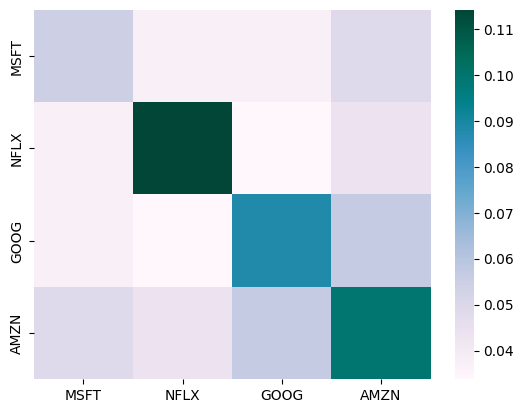

In [56]:
sns.heatmap(covar_US, cmap='PuBuGn')

<Axes: >

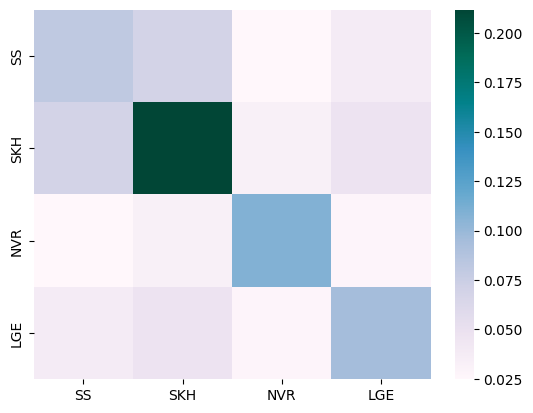

In [57]:
sns.heatmap(covar_KR, cmap='PuBuGn')

In [58]:
port_risk_US= np.dot(weights.T, np.dot(covar_US, weights))
print(port_risk_US)
port_risk_KR= np.dot(weights.T, np.dot(covar_KR, weights))
print(port_risk_KR)

0.05463683316677561
0.06121459983259083


In [59]:
rf=0.02
port_sr_US= (port_return_US-rf)/port_risk_US
port_sr_KR= (port_return_KR-rf)/port_risk_KR
print(port_sr_US)
print(port_sr_KR)

16.15977939878751
1.1410823695712782


In [60]:
result=np.array([[port_return_KR, port_return_US], [port_risk_KR, port_risk_US], [port_sr_KR, port_sr_US]])
result=np.round(result, 3)

In [61]:
result=pd.DataFrame(result)
result.columns=['KR', 'US']
result.index=['Return', 'Risk', 'Sharpe ratio']
result

,KR,US
Return,0.090,0.903
Risk,0.061,0.055
Sharpe ratio,1.141,16.160


<Axes: >

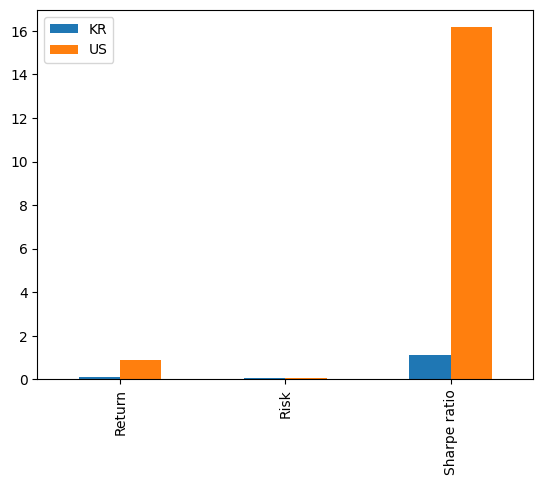

In [62]:
result.plot(kind='bar')